# EC1B1 Coursework Code (Group 59)

## 4.1 Downloading the Data

In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

spain_data = pd.read_excel('spain_data.xlsx', header = 2)
us_data = pd.read_excel('us_data.xlsx', header = 2)
pd.options.display.max_rows = 999

In [2]:
spain_column_names = ['Date', 'Spain: Industrial production', 'Spain: Exchange rates relative to the US dollar', 'Spain: International Reserves and Liquidity', 'Spain: Consumer prices']
spain_data.columns = spain_column_names

In [3]:
us_column_names = ['Date', 'US: International Reserves and Liquidity', 'US: Consumer prices']
us_data.columns = us_column_names

In [4]:
data = pd.merge(spain_data, us_data, on='Date')
data

,Date,Spain: Industrial production,Spain: Exchange rates relative to the US dollar,Spain: International Reserves and Liquidity,Spain: Consumer prices,US: International Reserves and Liquidity,US: Consumer prices
0,Jan 1960,NaN,60.000000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000000,360.000000,2.845198,21234.300000,13.528666
5,Jun 1960,NaN,60.000000,406.000000,2.842878,21169.800000,13.574526
6,Jul 1960,NaN,60.000000,427.000000,2.841719,20999.400000,13.574526
7,Aug 1960,NaN,60.000000,455.000000,2.847516,20803.400000,13.574526
8,Sep 1960,NaN,60.000000,479.000000,2.864902,20430.000000,13.574526
9,Oct 1960,NaN,60.000000,527.000000,2.872438,20068.200000,13.666246


## 4.2 Cleaning the data

In [5]:
# (i) log exchange rate
er = data['Spain: Exchange rates relative to the US dollar'].tolist()
log_er = []
for value in er:
    log = math.log(value)
    log_er.append(log)

In [6]:
# (ii) difference in the log exchange rate versus the previous month
log_dif_list = []
for i in range(0, len(er)-1):
    log_dif = log_er[i+1] - log_er[i]
    log_dif_list.append(log_dif)


In [7]:
# (iii) monthly inflation rate
spain_cpi = data['Spain: Consumer prices'].tolist()
mon_inf_list = []
for i in range(0, len(er)-1):
    inf = math.log(spain_cpi[i+1] / spain_cpi[i])
    mon_inf_list.append(inf)



In [8]:
# (iv) log industrial production
ip = data['Spain: Industrial production'].tolist()
log_ip = []
for value in ip:
    log = math.log(value)
    log_ip.append(log)
    

In [9]:
# (v) monthly growth in industrial production
indsutrial_growth_list = []
for i in range(0, len(ip)-1):
    growth = math.log(ip[i+1] / ip[i])
    indsutrial_growth_list.append(growth)

len(indsutrial_growth_list)

371

In [10]:
# (vi) growth in industrial production versus 12 months ago
tw_mon_prod = []
k = 0
while k < 360:
    growth = math.log(ip[k+12] / ip[k])
    tw_mon_prod.append(growth)
    k = k+12

len(tw_mon_prod)

30

In [11]:
# (vii) index of the value of international reserves (value of reserves at January 1960 = 100)
reserves_index = data['Spain: International Reserves and Liquidity'].tolist()
reserves_index_list = []
for reserve in reserves_index:
    index = reserve/reserves_index[0] * 100
    reserves_index_list.append(index)

In [12]:
# US monthly inflation rate
us_cpi = data['US: Consumer prices'].tolist()
mon_inf_list_2 = []

for i in range(0, len(er)-1):
    inf = math.log(us_cpi[i+1] / us_cpi[i])
    mon_inf_list_2.append(inf)



In [13]:
# US index of the value of international reserves (value of reserves at January 1960 = 100)
reserves_index = data['US: International Reserves and Liquidity'].tolist()
reserves_index_list_2 = []
for reserve in reserves_index:
    index = reserve/reserves_index[0] * 100
    reserves_index_list_2.append(index)
    

In [14]:
# monthly real exchange rate 
# first create the relative prices

rel_price_list = []
for i in range(0, 372):
  rel_price = (spain_cpi[i] / us_cpi[i])
  rel_price_list.append(rel_price)

In [15]:
# real exchange rate growth is simply the the exchange rate growth will be the same as formulas as the nominal
# but with the realtive price for each month multiplied by the exchange rate for the respecitve month

real_er_growth_list = []
for i in range(0, len(er)-1):
    real_er_growth = (math.log(er[i+1])*rel_price_list[i+1]) - (math.log(er[i])*rel_price_list[i])
    real_er_growth_list.append(real_er_growth)



In [16]:
data['Date'] = pd.to_datetime(data['Date'])
dates = data['Date'].tolist()
len(dates)
dates.pop(371)

dates2 = data['Date'].tolist()

## 5.3 Analysis

### 5.3.1 Exchange Rate and International Reserve Graphs

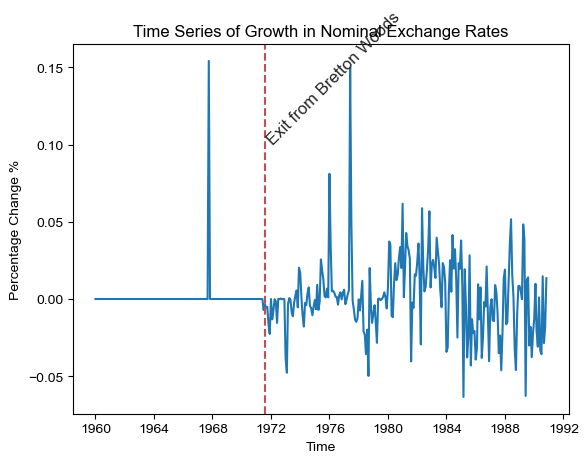

In [17]:
#Plot a time series graph of the monthly growth in nominal exchange rates
sns.lineplot(y = log_dif_list, x = dates)
sns.set(rc={'figure.figsize':(6,10)})
plt.title('Time Series of Growth in Nominal Exchange Rates')

plt.xlabel('Time')

plt.ylabel('Percentage Change %')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r')
plt.text(target_date, 0.100, 'Exit from Bretton Woods', rotation=45);

Note: the spike at 1967 is due to an increase of nominal exchange rate from 60 to 70 

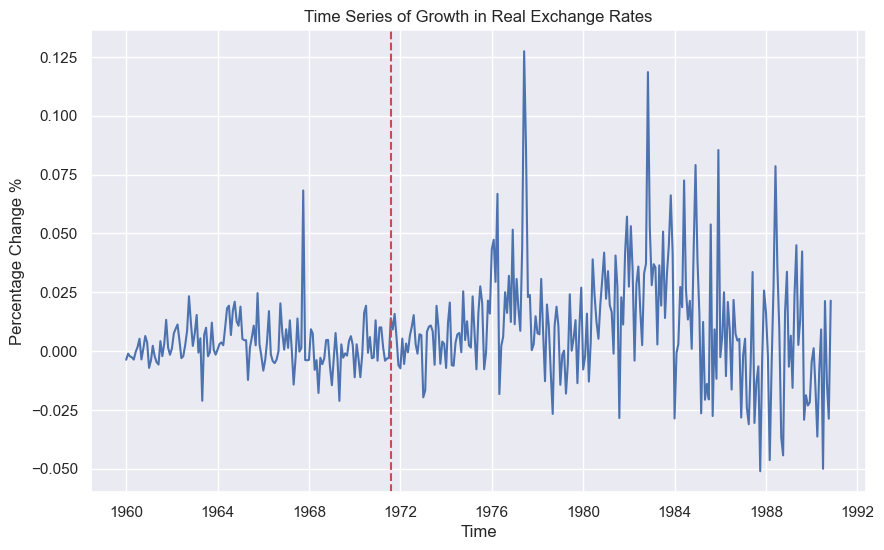

In [18]:
#Plot a time series graph of the monthly growth in real exchange rates
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(y = real_er_growth_list, x = dates)

plt.title('Time Series of Growth in Real Exchange Rates')

plt.xlabel('Time')

plt.ylabel('Percentage Change %')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r')
#plt.text(target_date, 0.100, 'Exit from Bretton Woods', rotation=45)
#the red dashed line represents the date at which Spain left the Bretton Woods Agreement
#- this is consistent for all future graphs but the label command in under the a comment using #
# to undo this simply remove the # although this may make the graph harder to interpret

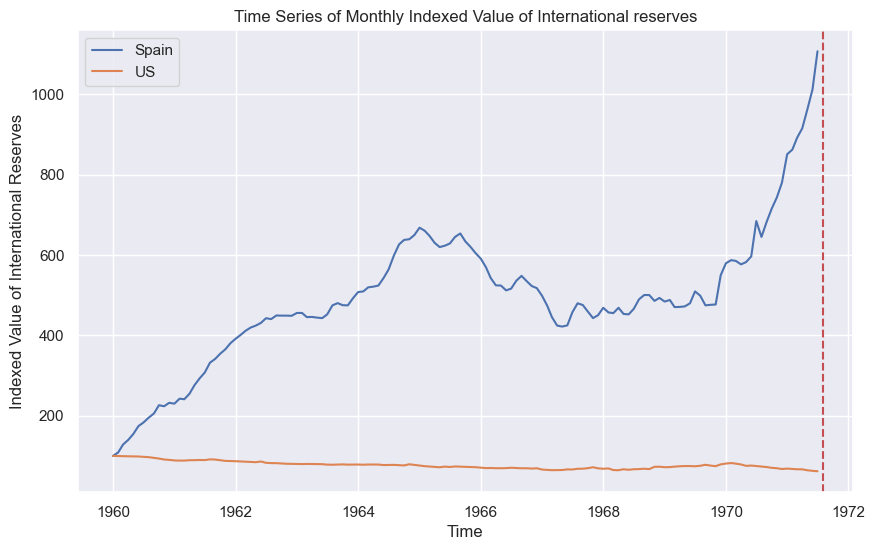

In [20]:
#Plot a time series graph of the monthly indexed value of international reserves of your country and the US from January 1960 until the exit of the US from Bretton Woods.

spl_dates = dates2[:139]
spl_spain_reserves = reserves_index_list[:139]
spl_us_reserves = reserves_index_list_2[:139]
sns.set(style="darkgrid")

sns.lineplot(y = spl_spain_reserves, x = spl_dates, label = 'Spain')
sns.lineplot(y = spl_us_reserves, x = spl_dates, label = 'US')
sns.set(rc={'figure.figsize':(6,20)})


plt.title('Time Series of Monthly Indexed Value of International reserves')

plt.xlabel('Time')

plt.ylabel('Indexed Value of International Reserves')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r',);
#plt.text(target_date, 20000, 'Exit from Bretton Woods', rotation=45)

### 5.3.2 Inflation and Industrial Production Graphs

In [ ]:
#time series of monthly inflation
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,6)})

sns.lineplot(y = mon_inf_list, x = dates)

plt.title('Time Series of Monthly Inflation')

plt.xlabel('Time')

plt.ylabel('Inflation Rate')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r');

In [ ]:
#time series of monthly growth in industrial production

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(y = indsutrial_growth_list, x = dates)

plt.title('Time Series of Monthly Growth in Industrial Production')

plt.xlabel('Time')

plt.ylabel('Monthly Growth in Industrial Production')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r');

In [ ]:
# 12 month dates

tw_mon_prod_dates = []
k = 0
while k < 360:
    date = dates[k]
    tw_mon_prod_dates.append(date)
    k = k+12

len(tw_mon_prod_dates)


In [ ]:
#time series of 12 monthly growth in industrial production

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(y = tw_mon_prod, x = tw_mon_prod_dates)

plt.title('Time Series of 12 Month Growth in Industrial Production')

plt.xlabel('Time')

plt.ylabel('12 Monthly Growth in Industrial Production')

target_date = pd.Timestamp('1971-08-01')
plt.axvline(x=target_date, linestyle='--', color='r');

### 5.3.3 Comparison Statistics 

In [ ]:
# nominal exchange rate sd
s1 = pd.Series(log_dif_list)
s1[:126].std()

In [ ]:
s1[146:].std()

In [ ]:
# real exchange rate sd
s2 = pd.Series(real_er_growth_list)
s2[:126].std()

In [ ]:
s2[146:].std()

In [ ]:
# inflation rate sd
s3 = pd.Series(mon_inf_list)
s3[:126].std()

In [ ]:
s3[146:].std()

In [ ]:
# difference in monthly inlfation between US and Spain
dif_mon_inf = []
for i in range(0,371):
    mon_dif = mon_inf_list[i] - mon_inf_list_2[i]
    dif_mon_inf.append(mon_dif)

In [ ]:
s4 = pd.Series(dif_mon_inf)
s4[:126].std()

In [ ]:
s4[146:].std()

In [ ]:
s5 = pd.Series(tw_mon_prod)
s5[:12].std()

In [ ]:
s5[13:].std()

In [ ]:
len(real_er_growth_list)

In [ ]:
log_dif_list.insert(0, 'N/A')
mon_inf_list.insert(0, 'N/A')
mon_inf_list_2.insert(0, 'N/A')
indsutrial_growth_list.insert(0, 'N/A')
real_er_growth_list.insert(0, 'N/A')

In [ ]:
# creating the final merged dataset of final variables

final_df = pd.DataFrame({'Log Exchange Rate': log_er, 
                         "Percentage Change in the Nominal Exchange Rate": log_dif_list, 
                         'Spain Monthly Inflation Rate':mon_inf_list,
                         'Log Industrial Production': log_ip,
                         'Monthly Growth in Industrial Production':indsutrial_growth_list,
                         'Spain Index of the value of international reserves (January 1960 = 100) ':reserves_index_list,
                         'US Monthly Inflation Rate':mon_inf_list_2,
                         'US index of the value of international reserves (value of reserves at January 1960 = 100)': reserves_index_list_2,
                         'Monthly Growth in Real Exchange Rates': real_er_growth_list
                         })
final_df